# Patient Event Scenario module no 25 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("Patient.csv")

In [3]:
df.head()

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A


In [4]:
df.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


In [5]:
df.shape

(10, 4)

In [6]:
df['Scenario'].value_counts() # value present 10 of A no multiple scenario

A    10
Name: Scenario, dtype: int64

In [8]:
Time_d = df['Followup'] # Duataion of time 

In [9]:
#Create our model
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [11]:
kmf.fit(durations=Time_d,event_observed=df['Eventtype'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

In [12]:
kmf.percentile

<bound method UnivariateFitter.percentile of <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>>

In [13]:
kmf.durations

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  6.2,  8. ,  9. , 10. ])

In [14]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,10,10
1.0,1,1,0,0,10
2.0,1,1,0,0,9
3.0,1,0,1,0,8
4.0,1,0,1,0,7
5.0,1,1,0,0,6
6.0,1,1,0,0,5
6.2,1,1,0,0,4
8.0,1,0,1,0,3


In [15]:
kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,6.2
1.0,5.2
2.0,7.0
3.0,6.0
4.0,5.0
5.0,4.0
6.0,3.0
6.2,inf
8.0,inf


In [17]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.900000
2.0,0.800000
3.0,0.800000
4.0,0.800000
5.0,0.666667
6.0,0.533333
6.2,0.400000
8.0,0.400000


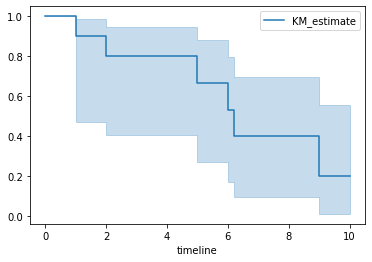

In [18]:
kmf.plot()